In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
# Read dataset 
df = pd.read_csv("../datasets/fcc-forum-pageviews.csv", index_col="date")

In [13]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [14]:
# Clean data
df = df = df[
    (df['value'] >= (df['value'].quantile(0.025))) & 
    (df['value'] <= (df['value'].quantile(0.975)))   
    ]
df.index = pd.to_datetime(df.index)

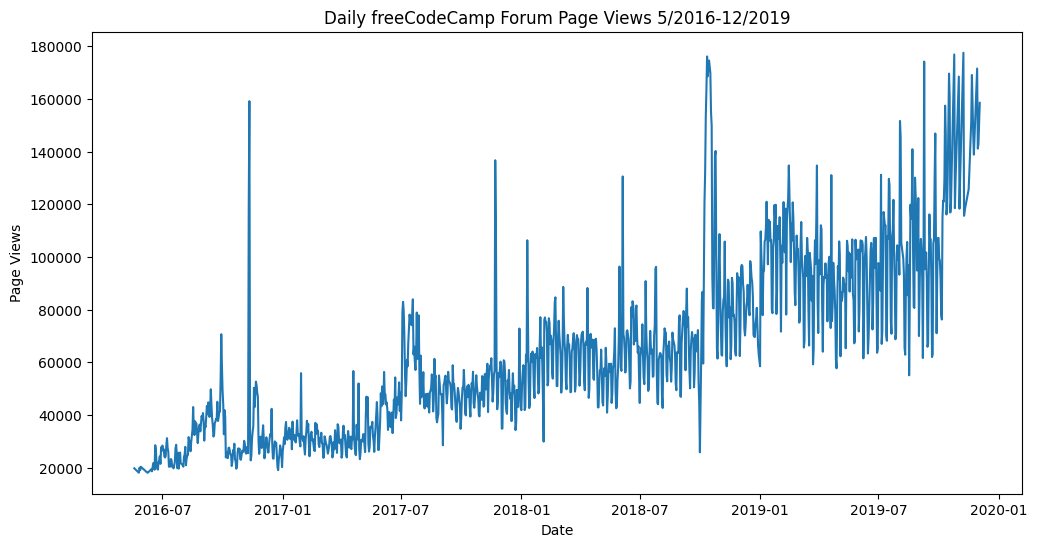

In [15]:
# Draw line plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df.value)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [16]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month
cbar = df_bar.groupby(
    ['year', 'month'])['value'].agg(['mean']).rename_axis(['year', 'month']).reset_index()
df_pivtab = pd.pivot_table(cbar, values='mean', index='year', columns='month')

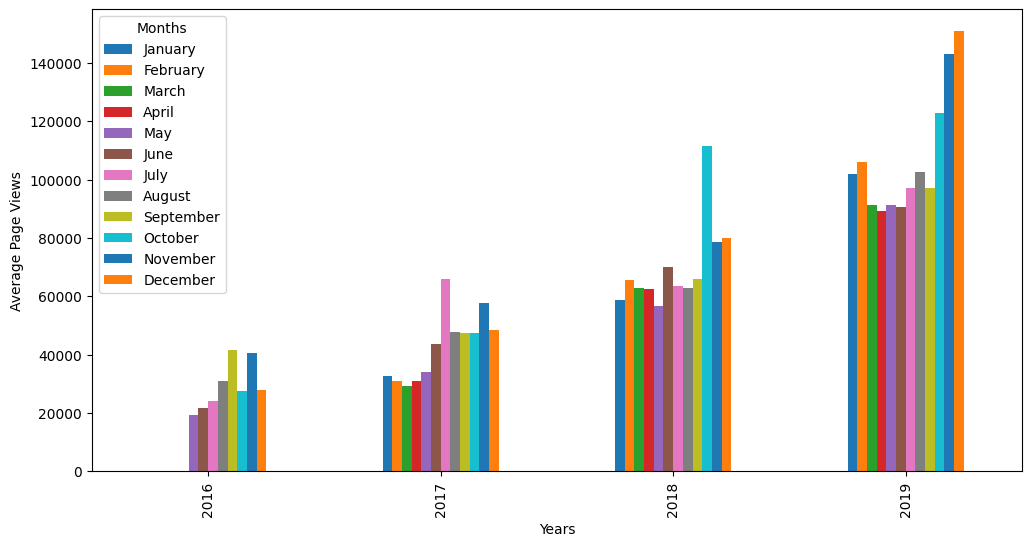

In [17]:
# Draw bar plot
ax = df_pivtab.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12,6)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')


In [18]:
# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

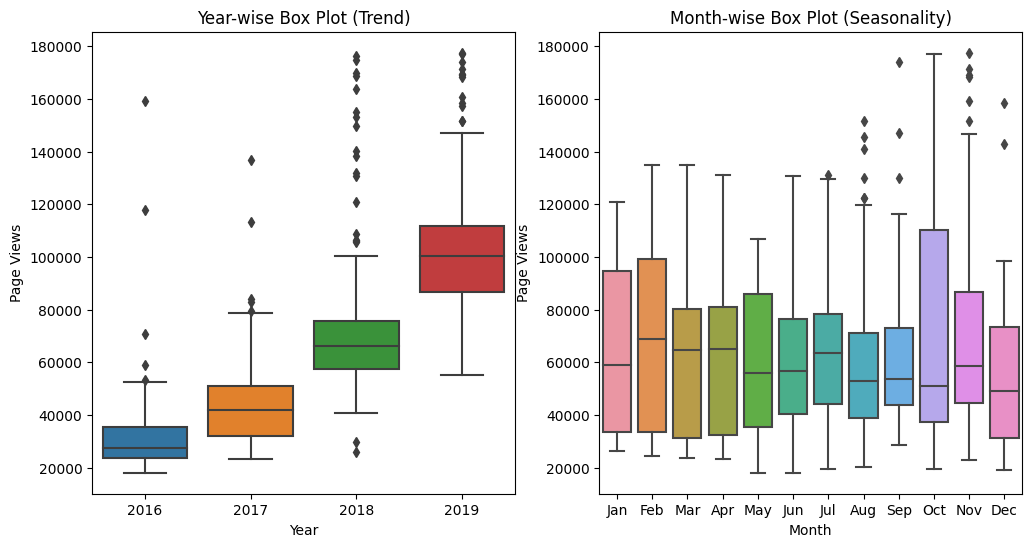

In [19]:
# Draw box plots (using Seaborn)
fig, axis = plt.subplots(1,2)
fig.set_size_inches(12, 6)
sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axis[0]).set(xlabel='Year', ylabel='Page Views')
sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axis[1],
    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']).set(xlabel='Month', ylabel='Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')